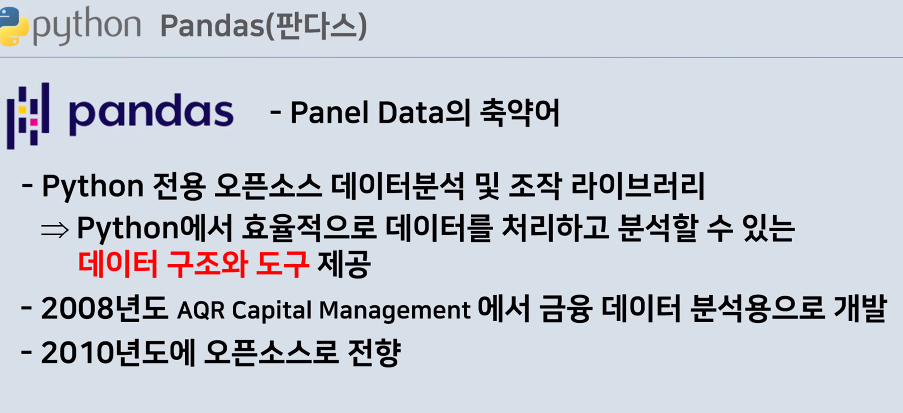

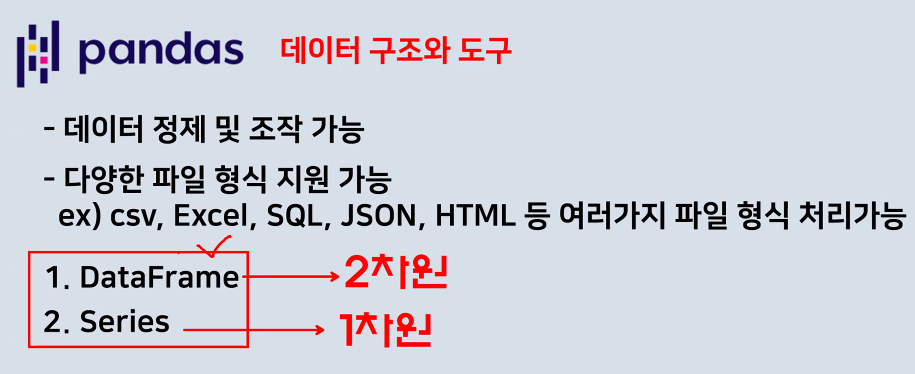

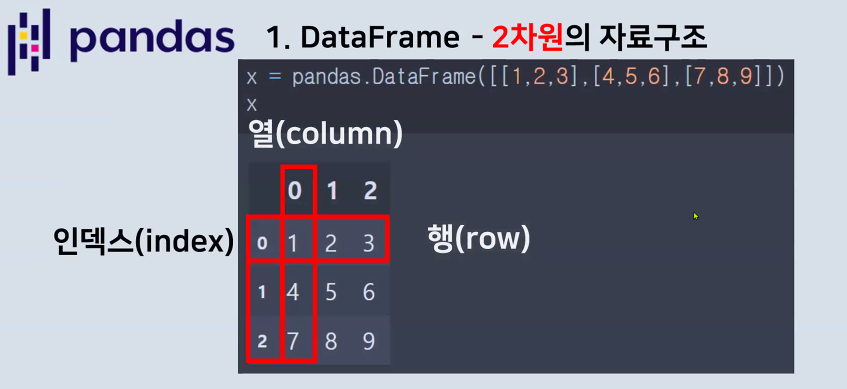

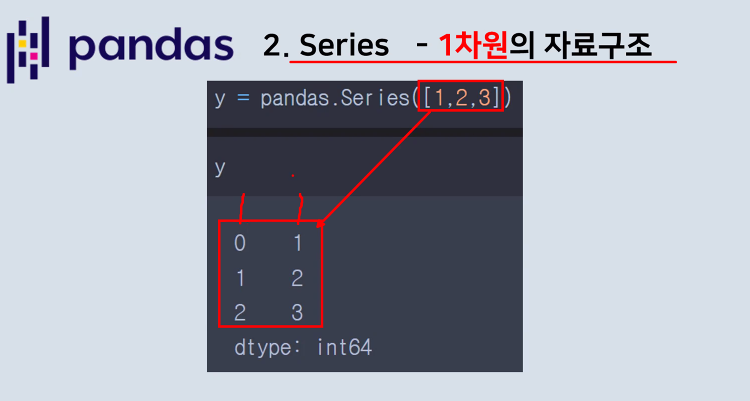

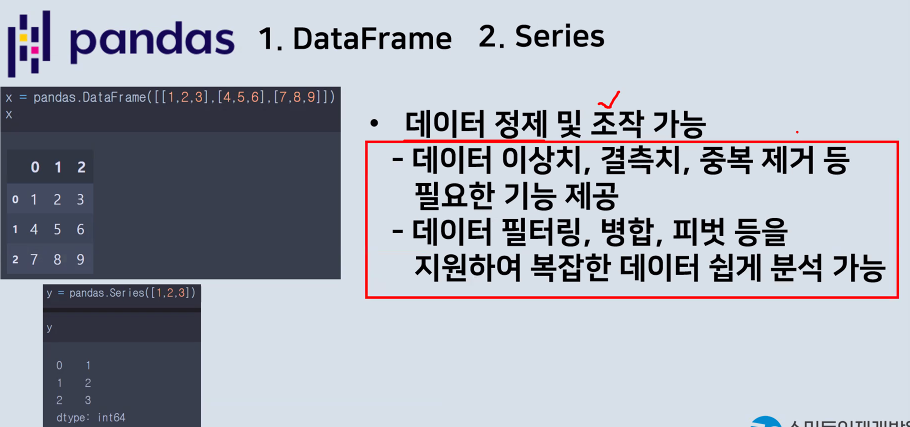

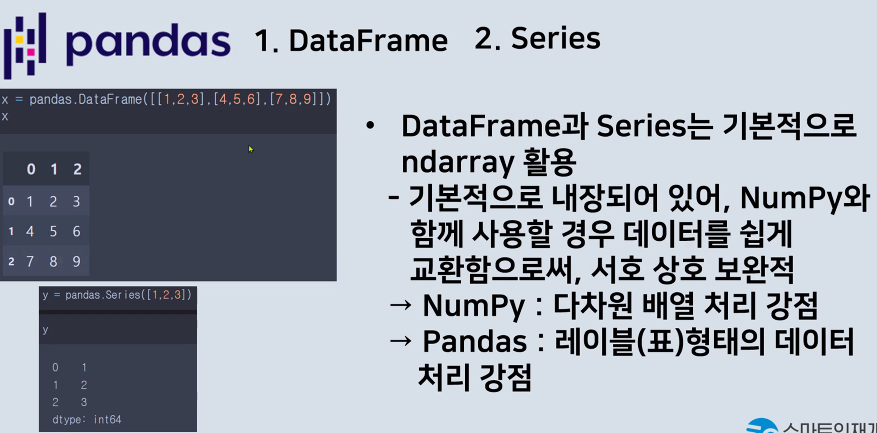

## 1. pandas
- pannel data의 약자
- 1. 다양한 파일 형식 지원 가능 -> csv, excel, SQL, JSON 등등
- 2. 데이터 정제 및 조작 특화된 라이브러리
- 3. DataFrame과 Series는 기본적으로 np.array(ndarray) 구조
     - numpy 라이브러리와 호환(상호보완적)💙
     - -> Numpy : 다차원 배열 처리 강점 / Pandas : 레이블(표) 형태의 데이터 처리 강점
     

### 1.1 pandas에서 제공하는 데이터 구조
- Series : 1차원 배열 형태의 데이터 구조
     - index + value
- DataFrame : 2차원 배열 형태의 데이터 구조
     - Series들의 모음
     - column(열) + row(행) 구조
     - 서로 다른 자료형을 저장하여 활용할 수 있다!
- 우리의 궁극적인 목적은 "데이터 분석"

In [1]:
import numpy as np
import pandas as pd

### 1 Series 다루기

#### 1.1 Series 생성

In [2]:
# Series 생성
pop = pd.Series([9668465,3391946,2942828,1450062])
print(pop, end='\n\n')

# index명 지어주기
# pd.Series([시퀀스 자료 구조],index =['인덱스명1','인덱스명2',...])
pop = pd.Series([9668465,3391946,2942828,1450062],
                index=['서울','부산','인천','광주'])
print(pop)

0    9668465
1    3391946
2    2942828
3    1450062
dtype: int64

서울    9668465
부산    3391946
인천    2942828
광주    1450062
dtype: int64


In [3]:
# 인덱스명을 지어줬다고 인덱스 번호가 사라지진 않는다.
print(pop[0])
print(pop['서울'])

9668465
9668465


In [4]:
# Series 값 확인
print(pop.values , end ="\n\n")
print(pop.array)

[9668465 3391946 2942828 1450062]

<PandasArray>
[9668465, 3391946, 2942828, 1450062]
Length: 4, dtype: int64


In [5]:
# Series index 확인
pop.index

Index(['서울', '부산', '인천', '광주'], dtype='object')

In [6]:
# Series 데이터 타입 확인
print(pop.dtype) # 요소들의 타입 확인
print(type(pop)) # Series 타입 확인

int64
<class 'pandas.core.series.Series'>


In [7]:
# Series 이름 지정
# Series에 큰 타이틀 이름 지정
pop.name = '인구'

# Series에 index 이름 지정
pop.index.name ='지역'

In [8]:
pop

지역
서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 인구, dtype: int64

In [9]:
# Series 연산
pop / 1000000

지역
서울    9.668465
부산    3.391946
인천    2.942828
광주    1.450062
Name: 인구, dtype: float64

### 1.2 Series 인덱싱, 슬라이싱

In [10]:
pop

지역
서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 인구, dtype: int64

In [11]:
# 정수 인덱싱
print(pop[1])
# index 별명 인덱싱
print(pop['부산'])
# 다중 인덱싱(정수)
print(pop[[0,3,1]])
# 다중 인덱싱(index 별명)
print(pop[['서울','광주','부산']])

3391946
3391946
지역
서울    9668465
광주    1450062
부산    3391946
Name: 인구, dtype: int64
지역
서울    9668465
광주    1450062
부산    3391946
Name: 인구, dtype: int64


### 1.3 "iloc"와  "loc" 속성
- iloc : integer location(정수 위치) -> "행번호"를 가지고 값을 인덱싱 하는 방법
- loc : location(위치) -> "index 별명"을 가지고 값을 인덱싱/ 슬라이싱 하는 방법

In [12]:
print(pop.iloc[0]) # iloc 인덱싱
print(pop.iloc[0:2]) # iloc 슬라이싱

9668465
지역
서울    9668465
부산    3391946
Name: 인구, dtype: int64


In [13]:
print(pop.loc['서울']) # loc 인덱싱
print(pop.loc['서울':'부산']) # loc 슬라이싱(끝값 포함)

9668465
지역
서울    9668465
부산    3391946
Name: 인구, dtype: int64


### 1.4 Series boolean 인덱싱
- 특정 조건을 만족하는 값들의 인덱싱
- Series[Boolean mask]

In [14]:
pop[pop >= 2500000]

지역
서울    9668465
부산    3391946
인천    2942828
Name: 인구, dtype: int64

## Series Boolean 인덱싱, 연산실습!
- average monthly wage : 월 평균임금
- average daily wage : 일 평균임금

In [15]:
data = {'IT기획자':8644000, '데이터분석가':7158000,
       '응용SW개발자':6426000, 'IT품질관리자':8294000}
# 딕셔너리 자료형을 Series로 변환
sw_M_wage=pd.Series(data)
sw_M_wage

IT기획자      8644000
데이터분석가     7158000
응용SW개발자    6426000
IT품질관리자    8294000
dtype: int64

In [16]:
data2 = {'IT기획자':9543000, '데이터분석가':11226000,
       '시스템SW개발자':5100000, 'IT마케터':7801000}
sw_M_wage2 =pd.Series(data2)
sw_M_wage2

IT기획자        9543000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
dtype: int64

In [17]:
# 일 평균임금 계산
# 실제로는 3개월 간의 총 임금을 그 기간의 총 일수로 나눠서 산정
# 대충 일한 일 수로만 계산해보자(23일)

sw_D_wage= (sw_M_wage/23).astype(int)
sw_D_wage

IT기획자      375826
데이터분석가     311217
응용SW개발자    279391
IT품질관리자    360608
dtype: int32

In [18]:
# 두 회사의 차이를 비교하기 위해 연산 실행
# Series끼리의 연산 (가능하나, inner join으로만 나오게 된다.)
# NaN : 결측치(비어있는 값)
wage_minus=sw_M_wage2-sw_M_wage
wage_minus

IT기획자        899000.0
IT마케터             NaN
IT품질관리자           NaN
데이터분석가      4068000.0
시스템SW개발자          NaN
응용SW개발자           NaN
dtype: float64

In [19]:
# 비어있지 않은 데이터만 보는 경우
# notnull()
wage_minus[wage_minus.notnull()].astype(int)

IT기획자      899000
데이터분석가    4068000
dtype: int32

In [20]:
# 비어있는 데이터만 보는 경우
# isnull()
wage_minus[wage_minus.isnull()]

IT마케터      NaN
IT품질관리자    NaN
시스템SW개발자   NaN
응용SW개발자    NaN
dtype: float64

### 1.5 Series 데이터 추가, 수정, 삭제

In [21]:
# 수정
sw_M_wage2

IT기획자        9543000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
dtype: int64

In [22]:
# 주솟값 공유하기에 copy()써야함
sw = sw_M_wage2.copy()
sw['IT기획자']+=9742000
sw

IT기획자       19285000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
dtype: int64

In [23]:
sw_M_wage2['IT기획자']=9742000
sw_M_wage2

IT기획자        9742000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
dtype: int64

In [24]:
# 추가
sw_M_wage2['IT컨설턴트']=9805000
sw_M_wage2

IT기획자        9742000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
IT컨설턴트       9805000
dtype: int64

In [25]:
# 삭제
del sw_M_wage2['시스템SW개발자']

In [26]:
sw_M_wage2

IT기획자      9742000
데이터분석가    11226000
IT마케터      7801000
IT컨설턴트     9805000
dtype: int64

### 2. DataFrame
- 2차원 데이터에서 사용되는 자료구조
- 엑셀, Csv, DB, API 등등 불러오되, 다시 재구성해야 함

In [27]:
# 첫 번째 방법 : 딕셔너리를 통한 컬럼 단위로 생성

data = {'ITPM':[463,9543,57],
        '업무분석가':[544,11226,68],
       'IT아키텍트':[518,10672,64],
       'UIUX개발자':[291,6003,36]}
data

{'ITPM': [463, 9543, 57],
 '업무분석가': [544, 11226, 68],
 'IT아키텍트': [518, 10672, 64],
 'UIUX개발자': [291, 6003, 36]}

In [28]:
# DataFrame화
df = pd.DataFrame(data)
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
0,463,544,518,291
1,9543,11226,10672,6003
2,57,68,64,36


In [29]:
# DataFrame index 별명 수정
df.index = ['일평균임금','월평균임금','시간평균임금']
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간평균임금,57,68,64,36


In [30]:
# DataFrame화 + index 별명 수정
df = pd.DataFrame(data, index=['일평균임금','월평균임금','시간평균임금'])
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간평균임금,57,68,64,36


In [31]:
#  두 번째 방법(추천) : raw 단위로  list 활용
data2 =[[463,9543,57],
        [544,11226,68],
        [518,10672,64],
        [291,6003,36]]

columns=['일평균임금','월평균임금','시간평균임금']
row =['ITPM','업무분석가','IT아키텍트','UIUX개발자']
df=pd.DataFrame(data2,index =row , columns = columns)
df

,일평균임금,월평균임금,시간평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64
UIUX개발자,291,6003,36


In [32]:
# index와 colums의 전치(위치를 뒤바꿈)
# Transpose의 약자 -> T
df=df.T
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간평균임금,57,68,64,36


In [33]:
df.values

array([[  463,   544,   518,   291],
       [ 9543, 11226, 10672,  6003],
       [   57,    68,    64,    36]], dtype=int64)

In [34]:
df.index

Index(['일평균임금', '월평균임금', '시간평균임금'], dtype='object')

In [35]:
df.columns

Index(['ITPM', '업무분석가', 'IT아키텍트', 'UIUX개발자'], dtype='object')

## 2.1 DataFrame 인덱싱, 슬라이싱
- DataFrame은 "Series의 모임"
- DataFrame 인덱싱 : 하나의 Series를 가져옴
- DataFrame 슬라이싱 : 여러 개의 원하는 부분을 가져옴

#### 2.1.1 열접근(컬럼 선택)
- DataFrame명['컬럼명']

In [36]:
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일평균임금,463,544,518,291
월평균임금,9543,11226,10672,6003
시간평균임금,57,68,64,36


In [37]:
# Series -> 1차원 ->[]
df['ITPM']

일평균임금      463
월평균임금     9543
시간평균임금      57
Name: ITPM, dtype: int64

In [38]:
# DataFrame -> 2차원 ->[[]]
df[['ITPM','업무분석가']] 

,ITPM,업무분석가
일평균임금,463,544
월평균임금,9543,11226
시간평균임금,57,68


In [39]:
# DataFrame 추가
df['정보보안전문가']=[362,7426,45]
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426
시간평균임금,57,68,64,36,45


In [40]:
# 행은 이렇게 인덱싱 접근이 안된다!!!->인덱서 활용!!
df[['일평균임금']]

KeyError: "None of [Index(['일평균임금'], dtype='object')] are in the [columns]"

In [42]:
# 행은 슬라이싱
df[0:2]

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426


In [43]:
# 매우 헷갈림
# DataFrame은 컬럼은 인덱싱을 접근하고,
# row는 슬라이싱으로만 접근 가능한가?
# NO!!!!

## 2.2. DataFrame 슬라이싱 -> 인덱서(indexer) 활용💥
- 인덱서란?
    - DataFrame 객체에 대해서 "함수"가 아닌 "속성"으로써, 행과 열을 한번에 인덱싱/ 슬라이싱 할 수 있는 기능
    - "속성"이라서 [] 대괄호 사용
<br><br>
- loc[]인덱서
    - "인덱스 명"과 "컬럼명"을 가지고 값을 인덱싱/슬라이싱하는 방법
<br><br>
- iloc[]인덱서
    - "행번호"와 "열번호"를 가지고 값을 인덱싱/슬라이싱하는 방법

In [44]:
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426
시간평균임금,57,68,64,36,45


In [45]:
display(df.loc['시간평균임금'])
display(df.iloc[2])

ITPM       57
업무분석가      68
IT아키텍트     64
UIUX개발자    36
정보보안전문가    45
Name: 시간평균임금, dtype: int64

ITPM       57
업무분석가      68
IT아키텍트     64
UIUX개발자    36
정보보안전문가    45
Name: 시간평균임금, dtype: int64

- loc 인덱서
     - DataFrame명.loc["인덱스명","컬럼명"] 
         -  ,"컬럼명"은 생략가능
     - "컬럼명" 생략 시 해당 행의 모든 열을 출력!
- iloc 인덱서
     - DataFrame명.iloc["행번호","열번호"] 
         -  ,"열번호"는 생략가능
     - "열번호" 생략 시 해당 행의 모든 열을 출력!

In [46]:
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가
일평균임금,463,544,518,291,362
월평균임금,9543,11226,10672,6003,7426
시간평균임금,57,68,64,36,45


In [47]:
display(df.loc['시간평균임금','ITPM'])
display(df.iloc[2,0])

57

57

In [48]:
# 추천X -> 문제 발생!! 
df.ITPM

일평균임금      463
월평균임금     9543
시간평균임금      57
Name: ITPM, dtype: int64

In [63]:
df['2016임금']=[50,500,50]
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가,2016임금
일평균임금,463,544,518,291,362,50
월평균임금,9543,11226,10672,6003,7426,500
시간평균임금,57,68,64,36,45,50


In [64]:
# 숫자 쓸 때 실패!!<-변수명은 숫자로 시작할 수 없다!!
df.2016임금

SyntaxError: invalid decimal literal (606281863.py, line 2)

In [65]:
del df['2016임금']

In [54]:
# 인덱서를 활용하여 슬라이싱
# DF.인덱서[행의 시작값:행의 끝값,열의 시작값:열의 끝값] # 열은 생략가능
# 인덱서 활용하기 너무 어렵다 -> [:,:]

# loc -> 끝값 포함
display(df.loc['월평균임금':'시간평균임금','업무분석가':'UIUX개발자'])
# iloc -> 끝값 미포함
display(df.iloc[1:3,1:4])

,업무분석가,IT아키텍트,UIUX개발자
월평균임금,11226,10672,6003
시간평균임금,68,64,36


,업무분석가,IT아키텍트,UIUX개발자
월평균임금,11226,10672,6003
시간평균임금,68,64,36


In [57]:
# 멀티 row, 멀티 coloum 접근
# 인덱스 값을 list로 보내준다! -> list[]를 한 번 더 써야함

display(df.loc[['일평균임금','시간평균임금']])
display(df.loc[['일평균임금','시간평균임금'],['ITPM','정보보안전문가']])
display(df.iloc[[0,2],[0,4]])


,ITPM,업무분석가,IT아키텍트,UIUX개발자,정보보안전문가,2016임금
일평균임금,463,544,518,291,362,50
시간평균임금,57,68,64,36,45,50


,ITPM,정보보안전문가
일평균임금,463,362
시간평균임금,57,45


,ITPM,정보보안전문가
일평균임금,463,362
시간평균임금,57,45


### 2.3 DataFrame Boolean 인덱싱
- boolean mask 활용 ->"필터"

In [73]:
# 일평균임금이 400이상인 전체 데이터 추출
df=df.T
df

,일평균임금,월평균임금,시간평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64
UIUX개발자,291,6003,36
정보보안전문가,362,7426,45


In [82]:
display(df.loc[:,'일평균임금']>=400)
display(df['일평균임금']>=400)

ITPM        True
업무분석가       True
IT아키텍트      True
UIUX개발자    False
정보보안전문가    False
Name: 일평균임금, dtype: bool

ITPM        True
업무분석가       True
IT아키텍트      True
UIUX개발자    False
정보보안전문가    False
Name: 일평균임금, dtype: bool

In [83]:
display(df[df.loc[:,'일평균임금']>=400])
display(df[df['일평균임금']>=400])

,일평균임금,월평균임금,시간평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64


,일평균임금,월평균임금,시간평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64


In [84]:
# 1. 직업이 업무분석가와 정보보안전문가만 슬라이싱 한 후
# 2. 시간평균임금이 50이상인 직업을 불리안 인덱싱하자!

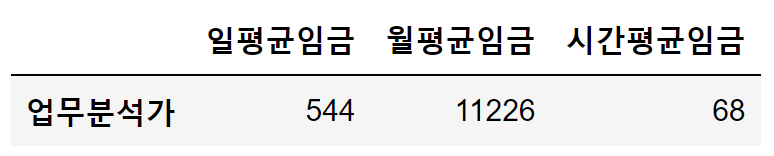

In [90]:
df

,일평균임금,월평균임금,시간평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64
UIUX개발자,291,6003,36
정보보안전문가,362,7426,45


In [103]:
# 1. 직업이 업무분석가와 정보보안전문가만 슬라이싱 한 후
df.loc[['업무분석가','정보보안전문가'],:]
df_a =df.loc[['업무분석가','정보보안전문가']]
df_a

,일평균임금,월평균임금,시간평균임금
업무분석가,544,11226,68
정보보안전문가,362,7426,45


In [105]:
# 2. 시간평균임금이 50이상인 직업을 불리안 인덱싱하자!
df_a[df_a['시간평균임금'] >= 50]

,일평균임금,월평균임금,시간평균임금
업무분석가,544,11226,68


## population 실습 - 값의 카운팅, 정렬
- pandas.read_csv('경로&파일명.확장자'{,encoding='방식',index_col='컬럼명'})
    <br>{} 생략가능
- encoding 방식 (한글로 불러오는 방법 3가지, 웬만하면 이 3가지로 한글 파일들은<br>다 불러올 수 있음)
    - euc-kr , utf-8, cp949
- index_col : 해당 컬럼을 index(별칭)으로 사용하는 속성(존재하는 컬럼 사용)


In [109]:
pop = pd.read_csv('./data/population.csv', index_col='도시')
pop

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016


In [113]:
# value_counts() 함수 
# 중복되는 것 개수 셈
# 각각의 값이 나온 횟수를 세어주는 기능
pop['2020'].value_counts()


9668465    1
3391946    1
2942828    1
1450062    1
2418436    1
Name: 2020, dtype: int64

In [114]:
# 결측치(NaN)은 count 되지 않는다!
pop['2010'].value_counts() 

10312545.0    1
1454636.0     1
2431774.0     1
Name: 2010, dtype: int64

In [129]:
# sort()_index()
# sort()_value()

In [120]:
# 1. sort_index() 인덱스를 기준으로 정렬
pop.sort_index() # 오름차순 ascending = True

,지역,2020,2015,2010,2005
도시,,,,,
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016
부산,경상권,3391946,NaN,NaN,3628293
서울,수도권,9668465,10022181.0,10312545.0,10167344
인천,수도권,2942828,2925815.0,NaN,2600495


In [121]:
pop.sort_index(ascending=False) #내림차순

,지역,2020,2015,2010,2005
도시,,,,,
인천,수도권,2942828,2925815.0,NaN,2600495
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
대구,경상권,2418436,2466052.0,2431774.0,2456016
광주,전라권,1450062,1474636.0,1454636.0,1401745


In [123]:
# 1. 열접근을 통해서 정렬하는 방법 → Series
# sort_values() : 데이터값을 기준을 정렬
# NaN 값은 ascending에 상관없이 항상 마지막에 위치
pop['2015'].sort_values(ascending =False)

도시
서울    10022181.0
인천     2925815.0
대구     2466052.0
광주     1474636.0
부산           NaN
Name: 2015, dtype: float64

In [125]:
# 2. DataFrame에서 기준을 정해서 정렬하는 방법
pop.sort_values(by='2010')

,지역,2020,2015,2010,2005
도시,,,,,
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495


In [128]:
# 이중 정렬!
# by=['컬럼명1','컬럼명2',...]-> 컬럼명 1 정렬 이후 컬럼명 2 정렬
pop.sort_values(by=['지역','2015'])
# by= 생략 가능

,지역,2020,2015,2010,2005
도시,,,,,
대구,경상권,2418436,2466052.0,2431774.0,2456016
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
서울,수도권,9668465,10022181.0,10312545.0,10167344
광주,전라권,1450062,1474636.0,1454636.0,1401745


## 3. score 실습 - DataFrame 정렬 복습 및 연산 실습

In [133]:
score = pd.read_csv('./data/score.csv',encoding='cp949',index_col='과목')
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


### axis=0, axis=1
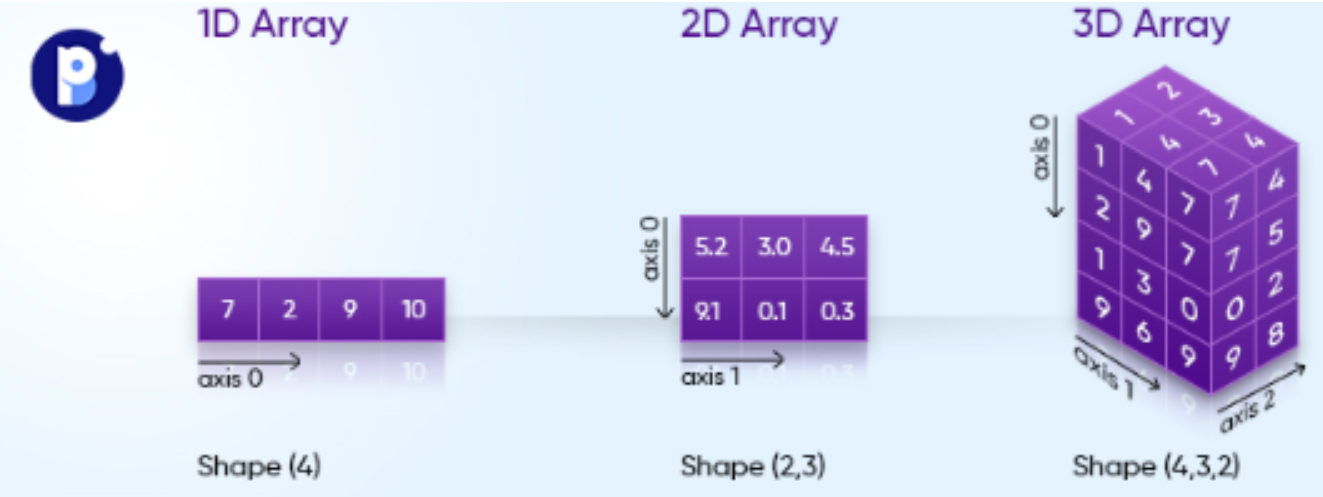
- 축의 "방향"을 뜻함("axis=0_행방향"과 "axis=1_열방향")
- axis=0 → 위아래로! , axis=1 → 양옆으로!
- axis=0 → 기본값

In [136]:
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [135]:
# sum(): 합계
# axis : 축의 방향을 설정하는 속성

# axis =0 : 기본값, 위아래 연산(행방향)
score.sum(axis=0)

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [137]:
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [138]:
score.sum(axis=1)

과목
파이썬    201
DB     282
자바     253
크롤링    298
Web    163
dtype: int64

In [139]:
# 새로운 컬럼 추가
score['5반']=[90,85,88,93,99]
score

,1반,2반,3반,4반,5반
과목,,,,,
파이썬,45,44,73,39,90
DB,76,92,45,69,85
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99


In [143]:
# 2반을 기준으로 내림차순 → ,ascending = False or [::-1]
score.sort_values('2반')[::-1]

,1반,2반,3반,4반,5반
과목,,,,,
자바,47,92,45,69,88
DB,76,92,45,69,85
크롤링,92,81,85,40,93
Web,11,79,47,26,99
파이썬,45,44,73,39,90


In [146]:
# drop() → "행"을 삭제하는 기능
# inplace=False →기본값 , True인 경우 즉시 적용
# inplace 대신에 기존 score = score.drop('DB')
score.drop('DB', inplace=True)

In [151]:
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [149]:
# del 객체 → "열"을 삭제
# inplace 없이 바로 반영!
del score['5반']

In [150]:
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [152]:
# 다시 불러오기
score=pd.read_csv('./data/score.csv',encoding='cp949',index_col='과목')
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [186]:
# 과목별 합계를 구하여 '합계' 컬럼을 생성

# 합계가 맞긴 한데, 연속 실행시키니 누적이 된다... -> 주솟값 참조가 이루어진다.
# "합계 열"이 이미 존재하는 경우, 
# 기존 "합계" 컬럼도 함께 다음 "합계"계산에 포함되어 지기 떄문에 누적됨
score['합계'] = score.sum(axis=1)
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,1608
DB,76,92,45,69,2256
자바,47,92,45,69,2024
크롤링,92,81,85,40,2384
Web,11,79,47,26,1304


In [187]:
del score['합계']

In [188]:
# 누적을 피하기 위해서는 슬라이싱 해줘야한다!!
# 정확한 슬라이싱 범위를 지정해서 누적을 피할 수 있다! (중요)
score['합계'] = score.loc[:,:'4반'].sum(axis=1)
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [193]:
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [ ]:
del score['반평균']

In [212]:
# 반 평균 구해보기
# 행접근해야함!!!! []-> 열접근 , loc[:{,:}]->열접근 {}생략가능
score.loc['반평균']= score.loc[:'Web'].mean(axis=0)

In [228]:
score = score.astype(int)
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163
반평균,54,77,59,48,239


### .apply()함수
- pandas 객체 (Series, DataFrame)에 "열" 혹은 "행"에 대해 함수를 적용하게 해주는 메소드
- pandas 라이브러리에 다른 라이브러리의 함수를 적용하는 방법
    - numpy의 라이브러리 엮을 때 사용
- (행에만 열에만 접근해서 함수를 쓰겠다!!! 보통 열접근 행 잘 안씀)

In [215]:
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Email': ['john@gmail.com', 'anna@yahoo.com', 'peter@gmail.com', 'linda@outlook.com']
}
df=pd.DataFrame(data)

In [216]:
df

,Name,Email
0,John,john@gmail.com
1,Anna,anna@yahoo.com
2,Peter,peter@gmail.com
3,Linda,linda@outlook.com


In [218]:
# 각 Email 부분에서 도메인을 추출
# '@'기호 기준으로 도메인 주소를 분할

def extract_domain(email) :
    return email.split('@')[1]

In [219]:
df

,Name,Email
0,John,john@gmail.com
1,Anna,anna@yahoo.com
2,Peter,peter@gmail.com
3,Linda,linda@outlook.com


In [222]:
df['Domain'] = df['Email'].apply(extract_domain)
df

,Name,Email,Domain
0,John,john@gmail.com,gmail.com
1,Anna,anna@yahoo.com,yahoo.com
2,Peter,peter@gmail.com,gmail.com
3,Linda,linda@outlook.com,outlook.com


In [226]:
def plus(num):
    return num+10

In [229]:
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163
반평균,54,77,59,48,239


In [227]:
# applymap() →  "요소" 전체에 대해 접근해서 함수를 적용시키는 메소드
score.applymap(plus)

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,55,54,83,49,211
DB,86,102,55,79,292
자바,57,102,55,79,263
크롤링,102,91,95,50,308
Web,21,89,57,36,173
반평균,64,87,69,58,249


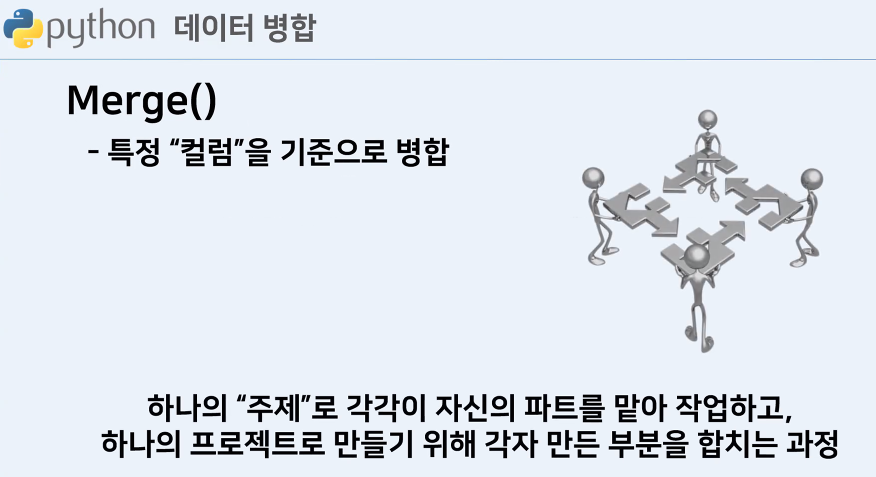
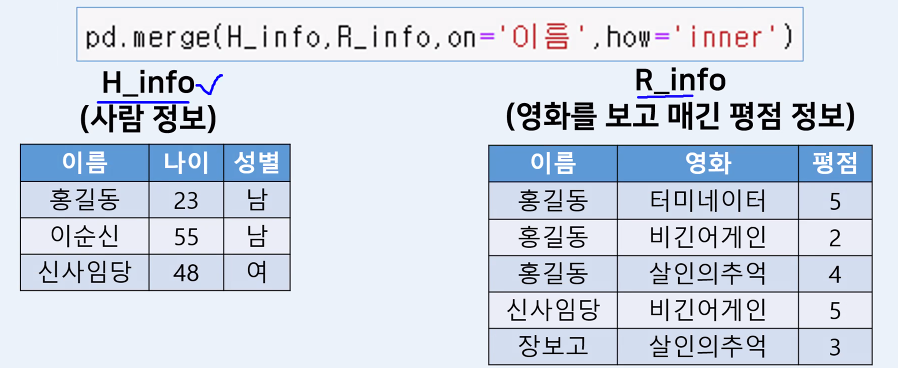
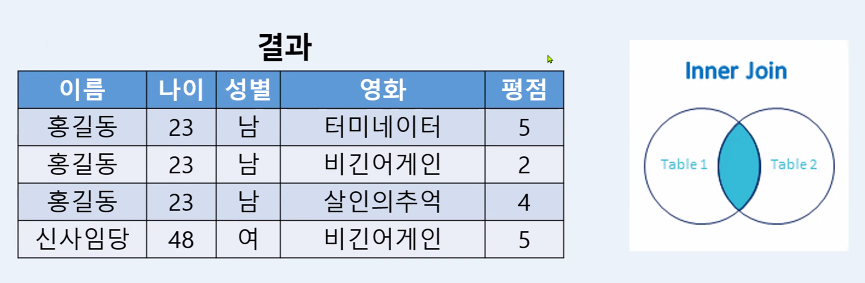
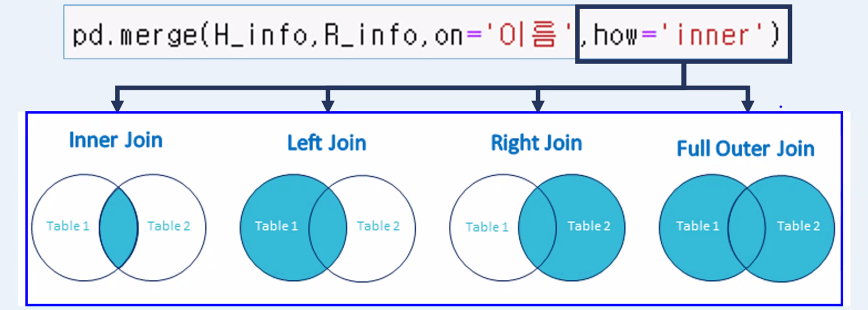

## 4. 데이터 병합

### 4.1 Merge() 함수 →"병합"
- 두 개의 pandas 객체를 합칠 때 특정 "컬럼"의 값을 기준으로 합치는 함수
- pd.merge(left,right, on ="컬럼명" , how ="inner")
- on -> 기준일 될 컬럼
- how -> join 방식 지정 (기본값 : inner)

In [230]:
data1 = {
    '이름': ['홍길동','이순신','신사임당'],
    '나이': ['23','55','48'],
    '성별':['남','남','여']
}

data2 = {
    '이름': ['홍길동','홍길동','홍길동','신사임당','장보고'],
    '영화': ['터미네이터','비긴어게인','살인의추억','비긴어게인','살인의추억'],
    '평점':['5','2','4','5','3']
}

In [232]:
H_info = pd.DataFrame(data1)
H_info

,이름,나이,성별
0,홍길동,23,남
1,이순신,55,남
2,신사임당,48,여


In [233]:
R_info = pd.DataFrame(data2)
R_info

,이름,영화,평점
0,홍길동,터미네이터,5
1,홍길동,비긴어게인,2
2,홍길동,살인의추억,4
3,신사임당,비긴어게인,5
4,장보고,살인의추억,3


In [238]:
pd.merge(H_info,R_info,on='이름',how='inner')

,이름,나이,성별,영화,평점
0,홍길동,23,남,터미네이터,5
1,홍길동,23,남,비긴어게인,2
2,홍길동,23,남,살인의추억,4
3,신사임당,48,여,비긴어게인,5


In [239]:
# How ='inner','left', 'right','outer' : 총 4가지
# left = inner + 왼쪽 테이블
pd.merge(H_info,R_info,on='이름',how='left')

,이름,나이,성별,영화,평점
0,홍길동,23,남,터미네이터,5
1,홍길동,23,남,비긴어게인,2
2,홍길동,23,남,살인의추억,4
3,이순신,55,남,NaN,NaN
4,신사임당,48,여,비긴어게인,5


In [240]:
# right = inner + 오른쪽 테이블
pd.merge(H_info,R_info,on='이름',how='right')

,이름,나이,성별,영화,평점
0,홍길동,23,남,터미네이터,5
1,홍길동,23,남,비긴어게인,2
2,홍길동,23,남,살인의추억,4
3,신사임당,48,여,비긴어게인,5
4,장보고,NaN,NaN,살인의추억,3


In [241]:
# outer = inner + 왼쪽 테이블 +오른쪽 테이블
pd.merge(H_info,R_info,on='이름',how='outer')

,이름,나이,성별,영화,평점
0,홍길동,23,남,터미네이터,5
1,홍길동,23,남,비긴어게인,2
2,홍길동,23,남,살인의추억,4
3,이순신,55,남,NaN,NaN
4,신사임당,48,여,비긴어게인,5
5,장보고,NaN,NaN,살인의추억,3


### 4.2 concat() 함수 → "이어붙이다"
- "축(axis)"을 기준으로 병합
- Series나 DataFrame을 "축의 방향(axis = 0,1)"을 설정하여 병합처리

- pd.concat([df1,df2,...],axis=0,join='outer',ignore_index=False)
- axis = 0(기본값) -> 병합할 축의 방향 설정
- join ="방식" -> merge() 함수에서 how 속성과 유사
    - inner, outer(기본값) 2가지
      <br>(inner을 쓰면 중요한 컬럼인데 날라가는 경우가 생길 수 있으니 기본값은 outer)
- ignore_index = True -> 인덱스를 새로 부여    

In [242]:
data3={
    '이름': ['홍길동','이순신'],
    '나이': ['23','55'],
    '성별': ['남','남']
}

data4 ={
    '이름':['신사임당','장보고'],
    '나이':['48','22'],
    '성별':['여','남']
}

In [244]:
df1 = pd.DataFrame(data3)
df1

,이름,나이,성별
0,홍길동,23,남
1,이순신,55,남


In [243]:
df2 = pd.DataFrame(data4)
df2

,이름,나이,성별
0,신사임당,48,여
1,장보고,22,남


In [248]:
# 주로 똑같은 컬럼(형태)의 다른 테이블을 하나의 테이블로 합치고자 할 떄 활용
pd.concat([df1,df2],axis=0)

,이름,나이,성별
0,홍길동,23,남
1,이순신,55,남
0,신사임당,48,여
1,장보고,22,남


In [247]:
pd.concat([df1,df2],axis=0,ignore_index=True)

,이름,나이,성별
0,홍길동,23,남
1,이순신,55,남
2,신사임당,48,여
3,장보고,22,남


In [249]:
pd.concat([df1,df2],axis=1)

,이름,나이,성별,이름,나이,성별
0,홍길동,23,남,신사임당,48,여
1,이순신,55,남,장보고,22,남


In [250]:
data5 ={
    '나이':['23','55','48'],
    '성별':['남','남','여']
}
data6 ={
    '주소':['서울','경기'],
    '학년':['3','1']
}

In [255]:
df3=pd.DataFrame(data5,index=['홍길동','이순신','신사임당'])
df4=pd.DataFrame(data6,index=['홍길동','신사임당'])

In [257]:
df3

,나이,성별
홍길동,23,남
이순신,55,남
신사임당,48,여


In [258]:
df4

,주소,학년
홍길동,서울,3
신사임당,경기,1


In [261]:
# 컬럼이 다른 경우 axis=1 (양옆)

# fillna(채울값) : 결측치를 채우는 함수
# MySQL에서는 csv를 DB로 insert할 수 있는데,
# 진짜 'NaN'값(비어있는 값)이 존재하는 경우 insert 작업시 error
# 'null'이라고 존재하는 경우 insert 작업시 비어있는 값

pd.concat([df3,df4],axis=1).fillna('null')

,나이,성별,주소,학년
홍길동,23,남,서울,3
이순신,55,남,null,null
신사임당,48,여,경기,1
